# Importando as Bibliotecas Necessárias

In [1]:
import pickle
import numpy as  np

import pandas as pd
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from sklearn.metrics import confusion_matrix

from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# Carregando os dados

In [2]:
# Carregando o dataset

train = pd.read_csv('../Dataset/Train/train.csv')
test = pd.read_csv('../Dataset/Test/test.csv')

In [3]:
# Definindo os dados

X_train = train.drop(columns=['class', 'sub_class'])
y_train = train['class']

X_test = test.drop(columns=['class', 'sub_class'])
y_test = test['class']

# Definindo e Treinando o Classificador

In [4]:
# Creating the random forest classifier

clf = RandomForestClassifier(n_estimators=1000,
                             max_depth=30,
                             class_weight='balanced',
                             random_state=42)

In [5]:
# Training the classifier

clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=50, n_estimators=1000,
                       random_state=42)

In [6]:
# Salvando o modelo

filename = '../Models/Classifiers/rf.sav'
pickle.dump(clf, open(filename, 'wb'))

In [7]:
# Carregando o classificar

# filename = '../Models/Classifiers/rf.sav'
# clf = pickle.load(open(filename, 'rb'))

In [8]:
# Predicting test data

y_scores = clf.predict_proba(X_test)[:, 1]

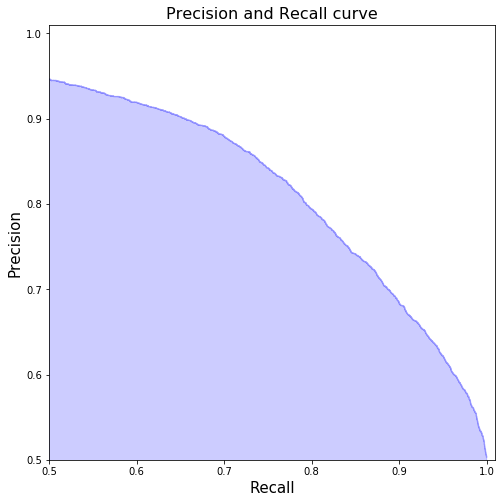

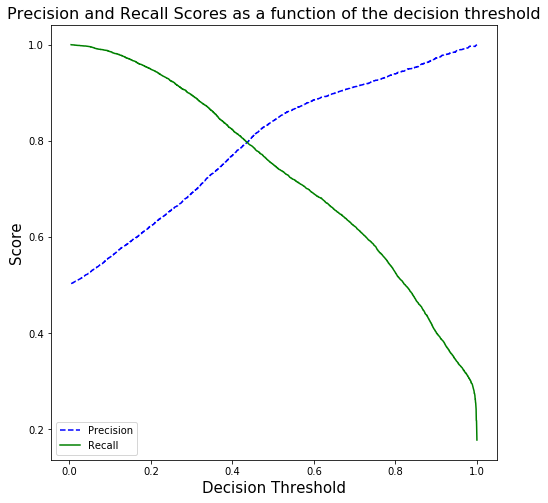

In [9]:
def precision_recall_threshold(p, r, thresholds, t=0.5):      
    plt.figure(figsize=(8,8))
    plt.title("Precision and Recall curve", fontsize = 16)
    plt.step(r, p, color='b', alpha=0.2, where='post')
    plt.fill_between(r, p, step='post', alpha=0.2, color='b')
    plt.ylim([0.5, 1.01]);
    plt.xlim([0.5, 1.01]);
    plt.xlabel('Recall', fontsize = 15);
    plt.ylabel('Precision', fontsize = 15);
    
    plt.savefig('../Figures/Random Forest/rf_pr.png')   
    
    
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold", fontsize = 16)
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score", fontsize = 15)
    plt.xlabel("Decision Threshold", fontsize = 15)
    plt.legend(loc='best')
    
    plt.savefig('../Figures/Random Forest/rf_prt.png')   
    

precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)
precision_recall_threshold(precisions, recalls, thresholds, t=0.44)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

In [10]:
# Defining the treshold

threshold = 0.435
y_pred = [round(i - threshold + 0.5) for i in y_scores]

# Apresentando Resultados

### Plotting Confusion Matrix 

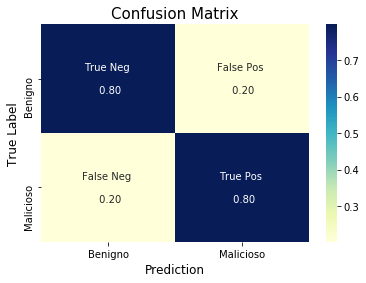

In [11]:
# Plotting Confusion Matrix
def plot_confusion_matrix(cm):
    cm_norm = np.asarray([cm[0]/sum(cm[0]),
                          cm[1]/sum(cm[1])])
    
    
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_percentages = ["{0:.2f}".format(value) for value in cm_norm.flatten()]
    labels = [f"{v1} \n\n {v2}" for v1, v2, in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)       
    

    x_axis_labels = ['Benigno', 'Malicioso'] # labels for x-axis
    y_axis_labels = ['Benigno', 'Malicioso'] # labels for y-axis
   
    sns.heatmap(cm,
                xticklabels=x_axis_labels,
                yticklabels=y_axis_labels,
                annot=labels,
                fmt='',
                cmap='YlGnBu')
    
    plt.title('Confusion Matrix', fontsize = 15)
    plt.xlabel('Prediction', fontsize = 12)
    plt.ylabel('True Label', fontsize = 12)
    
    plt.savefig('../Figures/Random Forest/rf_confusion_matrix.png')   
    
cm = confusion_matrix(y_test, y_pred, normalize='true')    
plot_confusion_matrix(cm)

In [12]:
index_list = [i for i, __ in enumerate(y_pred) if y_pred[i] == y_test[i] == 0]

In [13]:
df = pd.read_pickle('../Dataset/Test/raw_test.pickle')

In [14]:
df.loc[df.index[index_list]]

,domain,class,sub_class,ip_format,SSD,SUB,SLD,TLD,Third Party
36058,rnfy.rocks,0,0,0,rnfy,,rnfy,rocks,"{ ""domain_name"": null, ""registrar"": null, ..."
33689,handancp.cn,0,0,0,handancp,,handancp,cn,0
29083,77tcu.com,0,0,0,77tcu,,77tcu,com,0
5907,personalhealthrevolution.net,0,0,0,personalhealthrevolution,,personalhealthrevolution,net,"{ ""domain_name"": ""PERSONALHEALTHREVOLUTION.N..."
33558,cp05354.com,0,0,0,cp05354,,cp05354,com,0
...,...,...,...,...,...,...,...,...,...
27831,qfpq.net,0,0,0,qfpq,,qfpq,net,0
11988,agapelive.com,0,0,0,agapelive,,agapelive,com,"{ ""domain_name"": ""AGAPELIVE.COM"", ""registr..."
26441,betconstruct.com,0,0,0,betconstruct,,betconstruct,com,"{ ""domain_name"": [ ""BETCONSTRUCT.COM"", ..."
17164,campanile.fr,0,0,0,campanile,,campanile,fr,"{ ""domain_name"": ""campanile.fr"", ""registra..."


### Plotting Precision, Recall and F1-Score

In [15]:
print('Accuracy:  ', accuracy_score(y_test, y_pred))
print('Precision: ', recall_score(y_test, y_pred))
print('Recall:    ', precision_score(y_test, y_pred))
print('F1-score:  ', f1_score(y_test, y_pred))

Accuracy:   0.797534731680741
Precision:  0.7977297592997812
Recall:     0.7960966289067831
F1-score:   0.7969123574014619


### Plotting Cross Validations Scores

In [16]:
# Calculating Cross Validation
results = cross_validate(clf, X_train, y_train, cv=5)

In [17]:
# Imprimindo os resultados

## Resultado de cada k-fold
for i, score in enumerate(results["test_score"]):
    print(f"Acurácia K-fold no. {i} : {score}")

## Média dos k-folds
print()
print('Média dos K-folds:', np.mean(results["test_score"]))

Acurácia K-fold no. 0 : 0.7973099514769728
Acurácia K-fold no. 1 : 0.7957776453562612
Acurácia K-fold no. 2 : 0.7975653358304248
Acurácia K-fold no. 3 : 0.7928832893504725
Acurácia K-fold no. 4 : 0.7957602588115102

Média dos K-folds: 0.7958592961651284


### Plotting Roc Curve

Area Under Cruve (AUC): 0.8821708786187252


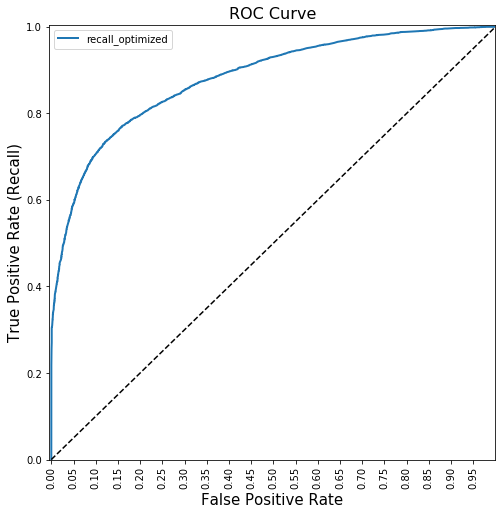

In [18]:
def plot_roc_curve(fpr, tpr, label=None):
    """
    The ROC curve, modified from 
    Hands-On Machine learning with Scikit-Learn and TensorFlow; p.91
    """
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve', fontsize = 16)
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate", fontsize = 15)
    plt.ylabel("True Positive Rate (Recall)", fontsize = 15)
    plt.legend(loc='best')
    
    plt.savefig('../Figures/Random Forest/rf_roc_curve.png')   
    
fpr, tpr, auc_thresholds = roc_curve(y_test, y_scores)
plot_roc_curve(fpr, tpr, 'recall_optimized')

# Roc Curve
print('Area Under Cruve (AUC):', auc(fpr, tpr)) # AUC of ROC   

# Post Analysis

In [7]:
def set_importances(clf, X_train):
    feature_cols = list(X_train.columns)
    feats = {} # a dict to hold feature_name: feature_importance
    for feature, importance in zip(feature_cols, clf.feature_importances_):
        feats[feature] = importance #add the name/value pair 

    importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance_value'})
    return importances

def top_n_features(importances, n):
    importances_subset = importances.sort_values(by='Importance_value', ascending=False)
    importances_subset = importances_subset.iloc[:n]
    features = list(importances_subset.index)
    return features
    
def plot_importances_sort(importances, features, filename=None):
    # Plotting
    
    importances_subset = importances[importances.index.isin(features)]  
    importances_subset = importances_subset.sort_values(by='Importance_value', ascending=False)
    
    fig, ax = plt.subplots(figsize=(16,8))
    importances_subset.plot.bar(rot=45, ax=ax)
    ax.set_title("Feature importances", fontsize = 16)
    ax.set_ylabel("Importance Value", fontsize = 15)
    
    ## Saving
    if filename != None:
        fig.savefig('../Figures/Random Forest/'+filename)   

def plot_importances_std(clf, importances, features, filename=None):
    ## Filtering by features
    indexes = [list(X_train.columns).index(feature) for feature in features]
    importances_subset = importances[importances.index.isin(features)]
    
    ## Calculating std
    std = []
    for tree in clf.estimators_:
        std.append([tree.feature_importances_[i] for i in indexes])    
    std = np.std(std, axis=0)

    
    ## Plotting
    fig, ax = plt.subplots(figsize=(16,8))
    importances_subset.plot.bar(yerr=std,rot=45, ax=ax)
    ax.set_title("Feature importances with std", fontsize = 16)
    ax.set_ylabel("Importance Value", fontsize = 15)
    fig.tight_layout()
    
    ## Saving
    if filename != None:
        fig.savefig('../Figures/Random Forest/'+filename)    

In [8]:
importances = set_importances(clf, X_train)
features = top_n_features(importances, n=10)

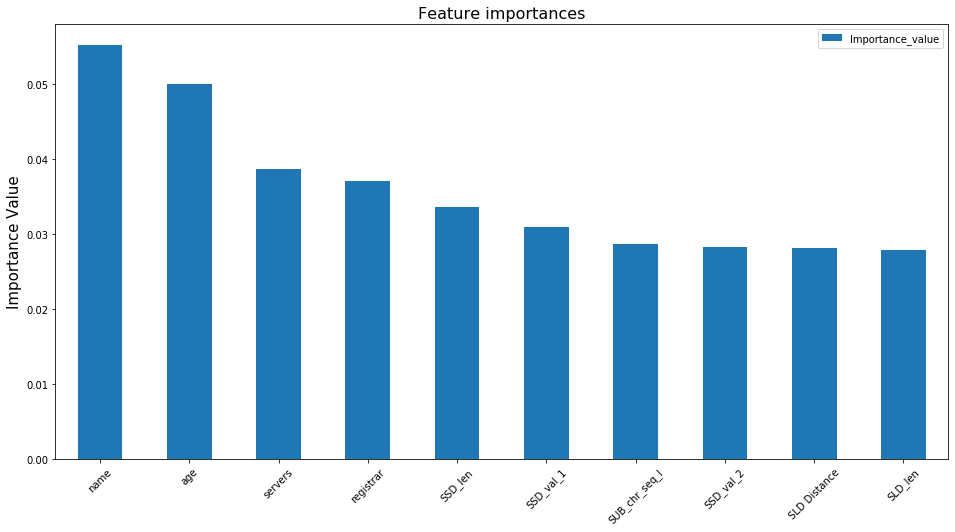

In [21]:
plot_importances_sort(importances, features, filename='rf_top10.png')

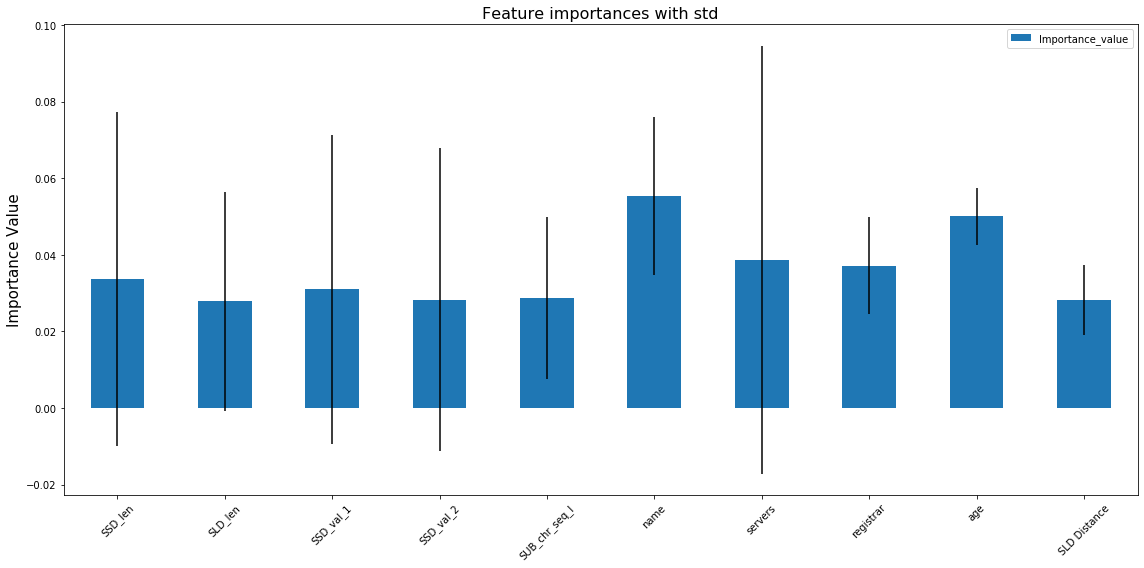

In [22]:
plot_importances_std(clf, importances, features, filename='rf_top10_std.png')

In [23]:
importances.sort_values(by='Importance_value', ascending=False)

,Importance_value
name,0.055280
age,0.050053
servers,0.038692
registrar,0.037126
SSD_len,0.033669
SSD_val_1,0.030968
SUB_chr_seq_l,0.028703
SSD_val_2,0.028258
SLD Distance,0.028172
SLD_len,0.027876


In [10]:
tp_list = ['connection',
            'privacy',
            'name',
            'address',
            'state',
            'country',
            'email',
            'servers',
            'registrar',
            'registrant',
            'org',
            'age',
            'SLDs in SUB',
            'SLD Distance']

sum(importances[importances.index.isin(tp_list)]['Importance_value'])

0.30093752675299607